In [102]:
import pandas as pd
! pip install pyfixest -q
import pyfixest as pf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **1. Data Analysis**

# 1.1 Dataset Inspection & Illustration

In [103]:
path_to_data = "https://raw.githubusercontent.com/sshi24/EEMP2024_group_project_EWSS/refs/heads/main/Data/07.11.2024_Data_Python_Project_part-1-oecd-alcohol-consumption-1950-to-2015_fixed.csv"
df = pd.read_csv(path_to_data,index_col=False)

# Overview headers and shape of df
pd.set_option('display.max_columns', None)
df

,Year,Cons_pc_Beer,Cons_pc_Wine,Cons_pc_Spirits,Cons_pc_Alkohol,Exp_pc_Beer,Exp_pc_Wine,Exp_pc_Spirits,Exp_pc_Alkohol,Exp_pc_Total,Exp_pc_Residual,Prices_Beer,Prices_Wine,Prices_Spirits,Prices_Alcohol,CPI_Beer,CPI_Wine,CPI_Spirits,CPI_Alcohol,CPI_AllGoods,Population,Real_GDPPC,Cond_Bugdget_Shares_Beer,Cond_Bugdget_Shares_Wine,Cond_Bugdget_Shares_Spirits,Uncond_Bugdget_Shares_Beer,Uncond_Bugdget_Shares_Wine,Uncond_Bugdget_Shares_Spirits,Uncond_Bugdget_Shares_Alcohol,Volume_Shares_Beer,Volume_Shares_Wine,Volume_Shares_Spirits,Exchange_Rate,Expenditure_pc_USD_Beer,Expenditure_pc_USD_Wine,Expenditure_pc_USD_Spirits,Expenditure_pc_USD_Alcohol,Expenditure_pc_USD_Total,Expenditure_pc_USD_Residuals,Price_USD_Beer,Price_USD_Wine,Price_USD_Spirits,Price_USD_Alcohol,Country
0,1970,6.13,1.67,1.06,8.86,66.22,23.98,15.54,105.74,1560.56,1454.83,10.80,14.32,14.70,12.31,7.04,17.36,6.85,0.00,8.86,12660.16,12023.54,0.63,0.23,0.15,0.04,0.02,0.01,0.07,0.69,0.19,0.12,0.90,73.74,26.70,17.31,117.75,1737.82,1620.08,12.03,15.95,16.37,13.71,Australia
1,1971,6.15,1.35,1.10,8.60,70.16,20.47,16.18,106.81,1681.89,1575.09,11.40,15.20,14.75,12.75,7.43,18.42,6.88,0.00,9.40,12937.20,12289.52,0.66,0.19,0.15,0.04,0.01,0.01,0.06,0.72,0.16,0.13,0.88,79.72,23.26,18.39,121.37,1911.24,1789.87,12.95,17.27,16.76,14.48,Australia
2,1972,6.30,1.55,1.24,9.10,75.59,23.50,18.51,117.59,1828.79,1711.20,12.00,15.12,14.88,13.23,7.83,18.33,6.93,9.01,9.97,13177.00,12404.42,0.64,0.20,0.16,0.04,0.01,0.01,0.06,0.69,0.17,0.14,0.84,90.09,28.01,22.06,140.16,2179.73,2039.57,14.30,18.02,17.73,15.76,Australia
3,1973,6.87,1.61,1.26,9.74,89.31,24.94,23.03,137.27,2007.49,1870.21,13.00,15.52,18.23,14.36,8.48,18.81,8.50,9.76,10.87,13380.40,12878.09,0.65,0.18,0.17,0.04,0.01,0.01,0.07,0.71,0.16,0.13,0.71,126.68,35.37,32.66,194.71,2847.50,2652.79,18.44,22.01,25.85,20.37,Australia
4,1974,7.00,1.77,1.21,9.98,103.54,31.91,27.84,163.30,2352.21,2188.92,14.80,18.00,22.98,16.67,9.65,21.82,10.71,10.98,12.55,13599.10,12985.12,0.63,0.20,0.17,0.04,0.01,0.01,0.07,0.70,0.18,0.12,0.70,148.99,45.92,40.06,234.96,3384.48,3149.52,21.29,25.90,33.06,23.99,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,2010,3.09,2.26,1.85,7.21,213.28,189.55,150.06,552.89,16022.37,15469.48,68.92,83.92,81.03,77.61,94.29,90.10,85.47,88.50,89.40,62766.37,23777.16,0.39,0.34,0.27,0.01,0.01,0.01,0.03,0.43,0.31,0.26,0.65,329.41,292.76,231.77,853.94,24746.41,23892.48,106.44,129.62,125.16,119.87,UK
1076,2011,3.00,2.38,1.78,7.17,216.81,207.86,155.78,580.45,16504.98,15924.53,72.24,87.25,87.31,81.65,98.83,93.67,92.09,93.66,93.40,63258.92,24057.35,0.37,0.36,0.27,0.01,0.01,0.01,0.04,0.42,0.33,0.25,0.62,347.56,333.21,249.73,930.49,26458.37,25527.88,115.81,139.86,139.96,130.90,UK
1077,2012,2.85,2.32,1.78,6.95,208.21,203.92,159.50,571.63,16995.88,16424.25,73.17,87.71,89.78,82.93,100.10,94.17,94.70,96.30,96.10,63695.69,24174.09,0.36,0.36,0.28,0.01,0.01,0.01,0.03,0.41,0.33,0.26,0.63,329.93,323.13,252.74,905.80,26931.55,26025.75,115.95,138.99,142.27,131.41,UK
1078,2013,2.78,2.07,1.72,6.57,204.33,186.43,163.91,554.67,17599.61,17044.95,73.46,90.08,95.30,85.31,100.50,96.71,100.52,99.61,98.50,64097.09,24541.57,0.37,0.34,0.30,0.01,0.01,0.01,0.03,0.42,0.31,0.26,0.64,319.39,291.42,256.21,867.02,27510.33,26643.32,114.83,140.80,148.96,133.35,UK


In [104]:
df.describe()

,Year,Cons_pc_Beer,Cons_pc_Wine,Cons_pc_Spirits,Cons_pc_Alkohol,Exp_pc_Beer,Exp_pc_Wine,Exp_pc_Spirits,Exp_pc_Alkohol,Exp_pc_Total,Exp_pc_Residual,Prices_Beer,Prices_Wine,Prices_Spirits,Prices_Alcohol,CPI_Beer,CPI_Wine,CPI_Spirits,CPI_Alcohol,CPI_AllGoods,Population,Real_GDPPC,Cond_Bugdget_Shares_Beer,Cond_Bugdget_Shares_Wine,Cond_Bugdget_Shares_Spirits,Uncond_Bugdget_Shares_Beer,Uncond_Bugdget_Shares_Wine,Uncond_Bugdget_Shares_Spirits,Uncond_Bugdget_Shares_Alcohol,Volume_Shares_Beer,Volume_Shares_Wine,Volume_Shares_Spirits,Exchange_Rate
count,1080.00000,1080.000000,1063.000000,1063.000000,1063.000000,662.000000,662.000000,662.000000,662.000000,9.250000e+02,7.590000e+02,662.000000,662.000000,662.000000,662.000000,689.000000,679.000000,663.000000,445.000000,869.000000,1080.00000,1080.000000,662.000000,662.000000,662.000000,686.000000,686.000000,686.000000,686.000000,1063.000000,1052.000000,1062.000000,1021.000000
mean,1992.00000,3.402037,3.103340,2.076341,8.609003,596.341677,384.564124,503.805363,1484.710952,1.325147e+05,1.584146e+05,198.396737,214.913489,254.590363,216.826541,69.234659,72.915361,74.733560,73.493573,204.400127,25251.58938,14650.974398,0.417175,0.237689,0.344517,0.020948,0.014913,0.017945,0.054373,0.415024,0.325114,0.259529,14.835152
std,12.99319,1.735436,2.479652,1.044508,2.989434,1600.557630,1367.841875,2281.142809,5163.269605,4.218533e+05,4.605253e+05,612.932794,866.501890,721.955506,611.629044,27.608687,25.933617,30.367882,27.545667,4299.336095,30023.14133,6355.537724,0.134711,0.140305,0.139784,0.017712,0.020905,0.021661,0.048049,0.162671,0.200014,0.120357,48.012297
min,1970.00000,0.060000,0.010000,0.060000,0.230000,1.200000,0.060000,0.420000,1.680000,8.019000e+01,1.560200e+02,2.120000,0.880000,1.430000,1.810000,1.380000,1.060000,0.670000,0.000000,0.000000,2950.10000,0.370000,0.080000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.020000,0.000000
25%,1981.00000,2.167500,1.280000,1.330000,6.845000,206.972500,94.432500,165.645000,645.220000,7.573160e+03,9.988205e+03,71.150000,59.850000,101.102500,72.010000,52.190000,58.690000,57.455000,69.540000,33.320000,7463.03500,9185.560000,0.320000,0.140000,0.240000,0.010000,0.000000,0.010000,0.030000,0.280000,0.170000,0.170000,0.730000
50%,1992.00000,3.235000,2.600000,1.990000,8.500000,328.715000,196.410000,282.380000,886.560000,1.476926e+04,1.541803e+04,120.155000,73.360000,181.070000,107.020000,76.380000,79.930000,80.530000,81.490000,65.120000,9967.83000,14651.345000,0.430000,0.220000,0.310000,0.020000,0.010000,0.010000,0.050000,0.430000,0.290000,0.240000,1.140000
75%,2003.00000,4.200000,4.080000,2.655000,10.460000,533.792500,336.782500,511.982500,1228.197500,3.589393e+04,4.172828e+04,150.475000,84.810000,213.565000,162.275000,90.860000,91.790000,95.345000,91.350000,84.740000,35265.67250,19513.945000,0.520000,0.320000,0.430000,0.030000,0.020000,0.020000,0.070000,0.535000,0.442500,0.340000,4.620000
max,2014.00000,9.250000,13.100000,5.490000,16.380000,36487.080000,32273.730000,56052.800000,124813.610000,2.329690e+06,2.307207e+06,10691.570000,18066.960000,17323.010000,13104.890000,114.050000,128.260000,180.690000,103.310000,126794.560000,127817.28000,29005.060000,0.730000,0.680000,0.790000,0.110000,0.210000,0.160000,0.330000,0.800000,0.920000,0.720000,358.150000


### Price of Wine in USD

In [105]:
# Convert Price_USD_Wine into numeric
df.Price_USD_Wine = pd.to_numeric(df.Price_USD_Wine, errors='coerce')
df.Price_USD_Wine.describe()

,Price_USD_Wine
count,661.000000
mean,66.379864
std,50.658302
min,0.120000
25%,28.340000
50%,59.810000
75%,96.790000
max,282.170000


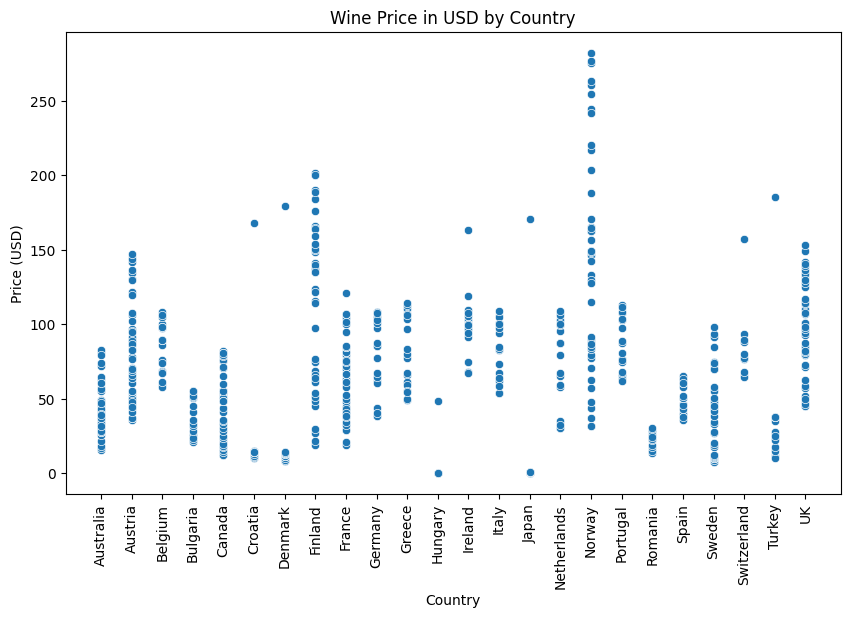

In [106]:
# Check outliers in Price_USD_Wine
## Plot Price_USD_Wine by Country in a scatter plot

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Country', y='Price_USD_Wine', data=df)
plt.xticks(rotation=90)
plt.title('Wine Price in USD by Country')
plt.xlabel('Country')
plt.ylabel('Price (USD)')
plt.show()

In [107]:
dfagg_p = df[df.Price_USD_Wine.isnull()==False].copy()

# Convert Price_USD_Wine to numeric, forcing non-numeric entries to NaN
#dfagg_p['Price_USD_Wine'] = pd.to_numeric(dfagg_p['Price_USD_Wine'], errors='coerce')

# Group by 'Country' and calculate the mean of 'Price_USD_Wine', then reset index
dfagg_p = dfagg_p.groupby('Country', as_index=False)['Price_USD_Wine'].mean()

# Sort values of 'Price_USD_Wine'
dfagg_p.sort_values('Price_USD_Wine', ascending=False)

,Country,Price_USD_Wine
16,Norway,145.068222
7,Finland,117.298140
12,Ireland,100.196316
23,UK,99.311556
17,Portugal,86.465789
21,Switzerland,86.038000
2,Belgium,85.036316
1,Austria,84.594444
10,Greece,82.538421
13,Italy,80.181579


[Text(0.5, 1.0, 'Average Wine Price (USD)')]

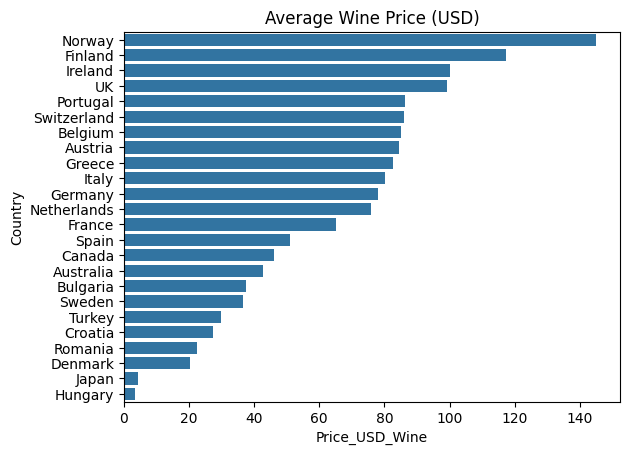

In [108]:
# plot in bar chart
sns.barplot(dfagg_p.sort_values('Price_USD_Wine', ascending=False), y='Country', x='Price_USD_Wine').set(title='Average Wine Price (USD)')

### Wine Consumption per capita

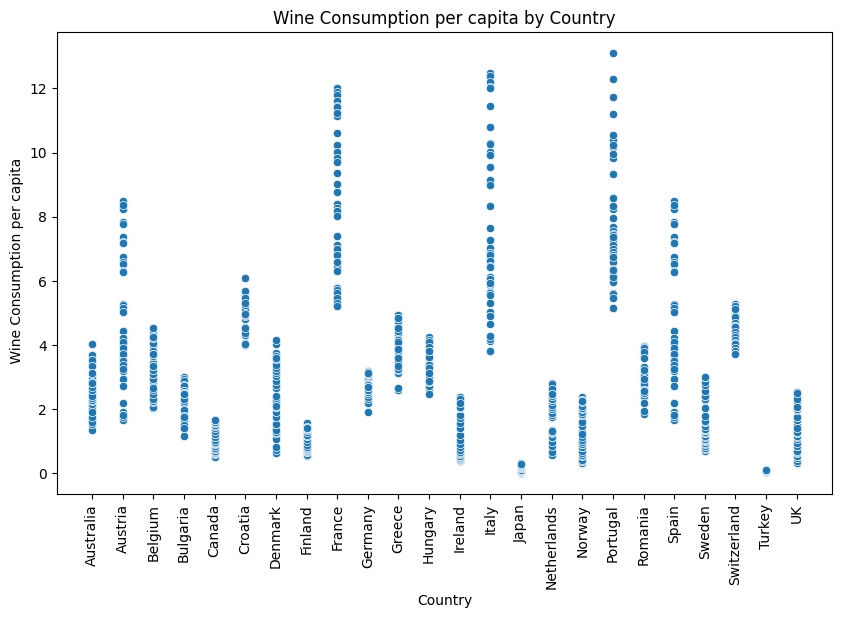

In [109]:
# Check outliers in Wine Consumption per capita by country
## Plot Wine Consumption per capita by Country in a scatter plot

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Country', y='Cons_pc_Wine', data=df)
plt.xticks(rotation=90)
plt.title('Wine Consumption per capita by Country') ############ unit: Liter???
plt.xlabel('Country')
plt.ylabel(' Wine Consumption per capita')
plt.show()

In [110]:
# Sort average yearly Wine Consumption per capita by country
dfagg_cons = df.groupby('Country').Cons_pc_Wine.mean().reset_index()
dfagg_cons.sort_values('Cons_pc_Wine', ascending=False)

,Country,Cons_pc_Wine
8,France,8.039111
17,Portugal,7.682000
13,Italy,7.395111
5,Croatia,4.943571
21,Switzerland,4.608444
19,Spain,4.575778
1,Austria,4.575778
10,Greece,3.859111
11,Hungary,3.507111
2,Belgium,3.258667


[Text(0.5, 1.0, 'Average Wine Consumption per capita')]

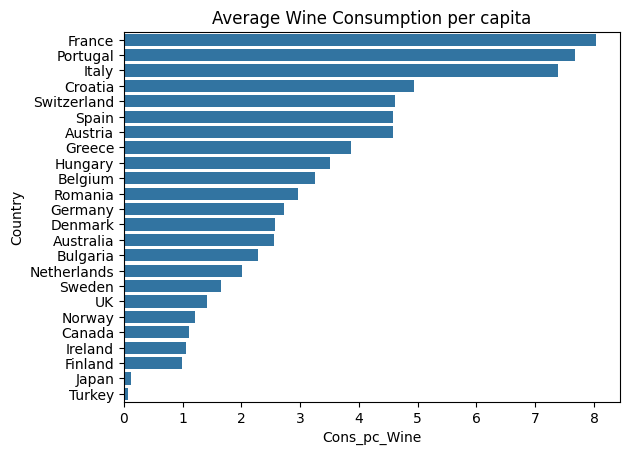

In [111]:
# Plot in a bar chart
sns.barplot(dfagg_cons.sort_values('Cons_pc_Wine', ascending=False), y='Country', x='Cons_pc_Wine').set(title='Average Wine Consumption per capita')

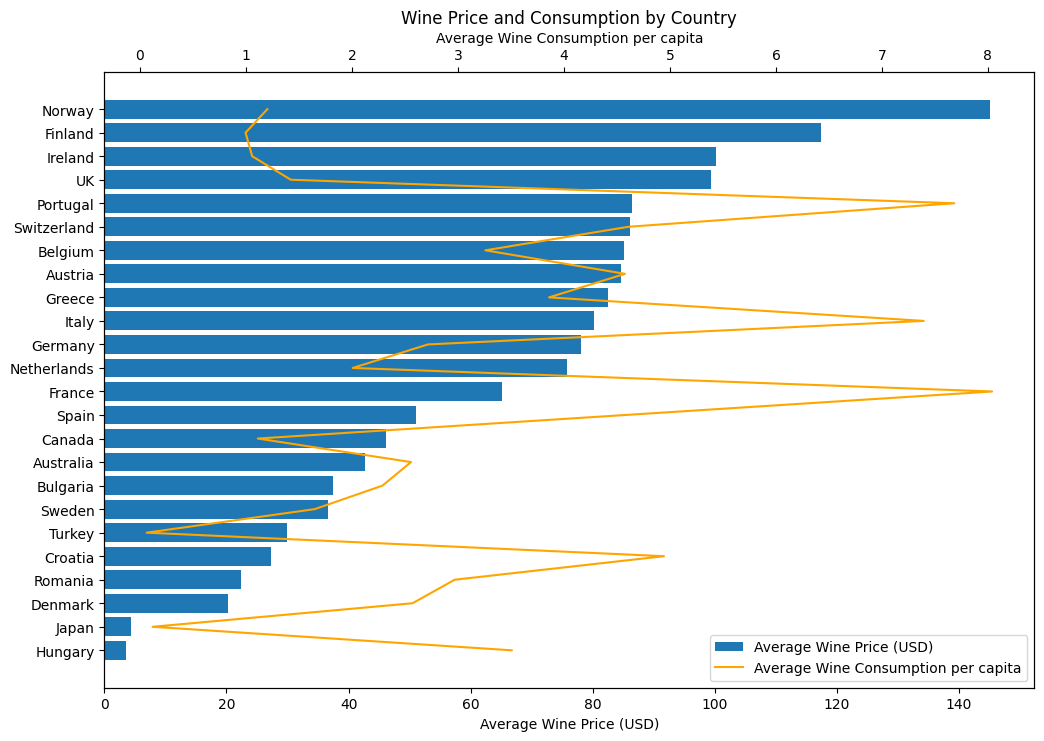

In [112]:
# Sort dfagg_p by Price_USD_Wine in descending order
dfagg_p_sorted = dfagg_p.sort_values('Price_USD_Wine', ascending=True)

# Get the order of countries based on Price_USD_Wine
country_order = dfagg_p_sorted['Country'].tolist()

# Filter dfagg_cons to include only countries present in country_order
dfagg_cons_filtered = dfagg_cons[dfagg_cons['Country'].isin(country_order)]

# Reorder dfagg_cons_filtered based on country_order
dfagg_cons_ordered = dfagg_cons_filtered.set_index('Country').loc[country_order].reset_index()


fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Price_USD_Wine as a bar chart on the left axis
ax1.barh(dfagg_p_sorted['Country'], dfagg_p_sorted['Price_USD_Wine'], label='Average Wine Price (USD)')
ax1.set_xlabel('Average Wine Price (USD)')

# Create a secondary y-axis on the right
ax2 = ax1.twiny()

# Plot Cons_pc_Wine as a line chart on the right axis, using the same y-axis order as Cons_pc_Wine
ax2.plot(dfagg_cons_ordered['Cons_pc_Wine'], dfagg_cons_ordered['Country'], color='orange', label='Average Wine Consumption per capita')
ax2.set_xlabel('Average Wine Consumption per capita')

# Set the title of the plot
plt.title('Wine Price and Consumption by Country')

# Add a legend for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

# Show the plot
plt.show()

# 1.2 Subset of Canada and Italy

In [113]:
# Create a subset of the DataFrame with only data for Canada and Italy
dfs = df[df['Country'].isin(['Canada', 'Italy'])]

<br><br><br>
# **2. Association Study**

In the following sections we analyze the sub data set of Canada and Italy.
- Canada (dummy=0)
- Italy (dummy=1)

# 2.1 Basic Regressions

In [114]:
# Run Regressions. Use subset.
reg1_1 = pf.feols('Price_USD_Wine ~ Cons_pc_Wine', data=dfs)
reg1_2 = pf.feols('CPI_Wine ~ Price_USD_Wine', data=dfs)
reg1_3 = pf.feols('Cons_pc_Wine ~ CPI_Wine', data=dfs)

labels = {"CPI_Wine":"CPI",
          "Price_USD_Wine":"Price",
          "Cons_pc_Wine":"Consumption per capita"}
pf.etable([reg1_1,reg1_2,reg1_3],labels=labels)

GT(_tbl_data=  level_0                 level_1                       0  \
0    coef  Consumption per capita   8.187*** <br> (1.415)   
1    coef                   Price                           
2    coef                     CPI                           
3    coef               Intercept  37.584*** <br> (4.154)   
4   stats            Observations                      64   
5   stats               S.E. type                     iid   
6   stats           R<sup>2</sup>                   0.351   

                        1                    2  
0                                               
1   0.797*** <br> (0.067)                       
2                          0.023* <br> (0.009)  
3  26.693*** <br> (4.141)   0.633 <br> (0.692)  
4                      64                   64  
5                     iid                  iid  
6                   0.695                0.092  , _body=<great_tables._gt_data.Body object at 0x7f5efbb32200>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7f5ef925cd00>, _spanners=Spanners([SpannerInfo(spanner_id='Price', spanner_level=1, spanner_label='Price', spanner_units=None, spanner_pattern=None, vars=['0'], built=None), SpannerInfo(spanner_id='CPI', spanner_level=1, spanner_label='CPI', spanner_units=None, spanner_pattern=None, vars=['1'], built=None), SpannerInfo(spanner_id='Consumption per capita', spanner_level=1, spanner_label='Consumption per capita', spanner_units=None, spanner_pattern=None, vars=['2'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7f5ef248afb0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value'

**Interpretation:**
1. When CPI (=Inflation rate) increases by 1, the Consumption increases by 0.023. Typically one expects weeker consumption with higher inflation.
2. When Prices increase, CPI increases by 0.797. This is intuitive as higher prices directly result in higher CPI
3. When Consumption increases, prices increase by 8.187. This can reflect demand/ supply adjustments of the market.

In [115]:
# Statistical analysis Regression 3
reg1_3.tidy()

,Estimate,Std. Error,t value,Pr(>|t|),2.5%,97.5%
Coefficient,,,,,,
Intercept,0.632737,0.691974,0.914393,0.364053,-0.750500,2.015974
CPI_Wine,0.022977,0.009154,2.510018,0.014697,0.004678,0.041276


<Axes: xlabel='Cons_pc_Wine', ylabel='Price_USD_Wine'>

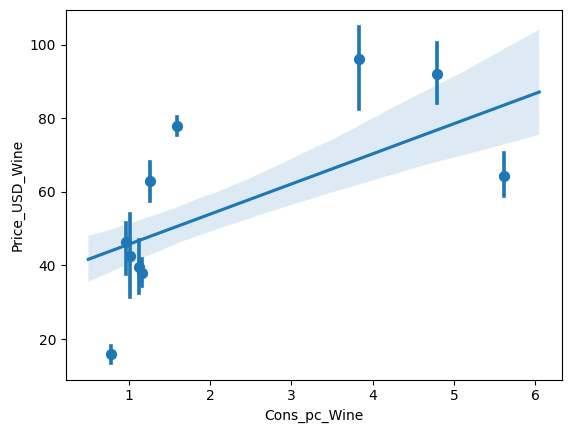

In [116]:
sns.regplot(x="Cons_pc_Wine", y="Price_USD_Wine", data=dfs, order=1, x_bins=10)

**Interpretation Statistical Tests:**

*   Standard error: how much do the results vary if we draw different samples?
*   **Standard error = 1.41**


*   H0:there is no connection between X (Consc_pc_Wine) and Y (Price_USD_Wine)
*   T-value= beta_head/ SE= 8.19/1,42=5,77
***t-value is larger than 1,96 hence at a significance level of 5% the H0 can be rejected**


*   95% Confidence interval: in 95% of the samples the 95% CI will include the true value
*   CI= 8,19 +/- 1.96*1,42= [5,41/10,97]
***does not include 0 hence H0 can be rejected**


**quadratic function seems fits better**


# 2.2 Dummy Variable & Interaction Effect

In [117]:
# Create dummy variables for Canada and Italy respectively
dfs['isItaly'] = (dfs['Country']=='Italy')*1

# Show dfs
dfs

<ipython-input-117-04fd002b9159>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['isItaly'] = (dfs['Country']=='Italy')*1


,Year,Cons_pc_Beer,Cons_pc_Wine,Cons_pc_Spirits,Cons_pc_Alkohol,Exp_pc_Beer,Exp_pc_Wine,Exp_pc_Spirits,Exp_pc_Alkohol,Exp_pc_Total,Exp_pc_Residual,Prices_Beer,Prices_Wine,Prices_Spirits,Prices_Alcohol,CPI_Beer,CPI_Wine,CPI_Spirits,CPI_Alcohol,CPI_AllGoods,Population,Real_GDPPC,Cond_Bugdget_Shares_Beer,Cond_Bugdget_Shares_Wine,Cond_Bugdget_Shares_Spirits,Uncond_Bugdget_Shares_Beer,Uncond_Bugdget_Shares_Wine,Uncond_Bugdget_Shares_Spirits,Uncond_Bugdget_Shares_Alcohol,Volume_Shares_Beer,Volume_Shares_Wine,Volume_Shares_Spirits,Exchange_Rate,Expenditure_pc_USD_Beer,Expenditure_pc_USD_Wine,Expenditure_pc_USD_Spirits,Expenditure_pc_USD_Alcohol,Expenditure_pc_USD_Total,Expenditure_pc_USD_Residuals,Price_USD_Beer,Price_USD_Wine,Price_USD_Spirits,Price_USD_Alcohol,Country,isItaly
180,1970,3.33,0.50,2.17,6.00,30.91,6.25,38.37,75.52,2345.06,2269.53,9.28,12.52,17.68,3.20,12.85,18.63,24.67,NaN,16.24,21749.99,12050.49,0.41,0.08,0.51,0.01,0.00,0.02,0.03,0.56,0.08,0.36,1.04,29.60,5.99,36.75,72.34,2246.22,2173.88,8.89,11.99,16.94,3.07,Canada,0
181,1971,3.53,0.59,2.44,6.56,33.62,7.26,40.26,81.14,2520.10,2438.95,9.52,12.37,16.50,3.39,12.94,20.12,24.85,NaN,16.70,22026.40,12561.93,0.41,0.09,0.50,0.01,0.00,0.02,0.03,0.54,0.09,0.37,1.01,33.29,7.18,39.86,80.34,2495.15,2414.81,9.42,12.24,16.34,3.36,Canada,0
182,1972,3.68,0.63,2.61,6.93,36.46,8.87,45.65,90.98,2787.75,2696.77,9.91,13.97,17.49,3.50,13.20,21.48,24.85,NaN,17.50,22284.50,13072.49,0.40,0.10,0.50,0.01,0.00,0.02,0.03,0.53,0.09,0.38,0.99,36.79,8.95,46.06,91.81,2813.07,2721.26,10.00,14.10,17.65,3.53,Canada,0
183,1973,3.82,0.67,2.86,7.35,39.32,10.57,50.15,100.05,3150.44,3050.40,10.29,15.67,17.54,3.80,13.71,23.42,25.29,NaN,18.83,22559.50,13837.90,0.39,0.11,0.50,0.01,0.00,0.02,0.03,0.52,0.09,0.39,1.00,39.32,10.57,50.15,100.05,3150.44,3050.40,10.29,15.67,17.54,3.80,Canada,0
184,1974,3.87,0.71,3.13,7.70,42.25,12.08,55.63,109.97,3623.62,3513.65,10.93,17.06,17.77,4.34,14.05,25.88,25.81,NaN,20.88,22874.70,14204.69,0.38,0.11,0.51,0.01,0.00,0.02,0.03,0.50,0.09,0.41,0.98,43.20,12.35,56.88,112.44,3705.13,3592.69,11.18,17.45,18.17,4.44,Canada,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,2010,1.43,3.83,0.72,5.98,206.74,280.65,143.84,631.23,16514.42,15883.19,144.85,73.35,199.16,105.64,94.46,88.91,92.84,90.82,93.10,59277.42,18520.43,0.33,0.44,0.23,0.01,0.02,0.01,0.04,0.24,0.64,0.12,0.75,274.15,372.15,190.73,837.03,21898.61,21061.58,192.08,97.27,264.09,140.08,Italy,1
626,2011,1.45,3.83,0.72,6.00,217.05,289.00,147.84,653.90,16962.03,16308.13,149.33,75.51,204.64,108.93,97.38,91.53,95.40,92.23,95.65,59379.45,18587.64,0.33,0.44,0.23,0.01,0.02,0.01,0.04,0.24,0.64,0.12,0.72,302.02,402.14,205.71,909.87,23601.88,22692.01,207.79,105.07,284.75,151.57,Italy,1
627,2012,1.46,4.29,0.68,6.44,220.28,335.00,141.07,696.35,16690.12,15993.77,150.57,78.01,207.49,108.18,98.19,94.56,96.73,95.16,98.56,59539.72,17886.18,0.32,0.48,0.20,0.01,0.02,0.01,0.04,0.23,0.67,0.11,0.78,283.22,430.71,181.38,895.31,21458.97,20563.65,193.59,100.30,266.78,139.08,Italy,1
628,2013,1.46,4.19,0.68,6.33,223.41,342.92,144.33,710.66,16395.29,15684.63,152.58,81.92,212.10,112.25,99.50,99.29,98.88,98.08,99.76,59831.09,17498.22,0.31,0.48,0.20,0.01,0.02,0.01,0.04,0.23,0.66,0.11,0.75,296.65,455.33,191.64,943.61,21769.77,20826.15,202.59,108.77,281.63,149.05,Italy,1


In [118]:
reg2_1 = pf.feols('Price_USD_Wine ~ Cons_pc_Wine*isItaly', data=dfs)
labels = {"CPI_Wine":"CPI",
          "Price_USD_Wine":"Price",
          "Cons_pc_Wine":"Consumption per capita",
          "isItaly":"isItaly"}
pf.etable([reg2_1],labels=labels)

GT(_tbl_data=  level_0                                level_1                         0
0    coef                 Consumption per capita    61.451*** <br> (5.596)
1    coef                                isItaly  207.771*** <br> (18.356)
2    coef  Consumption per capita &#215; isItaly   -82.389*** <br> (6.537)
3    coef                              Intercept    -22.194** <br> (6.432)
4   stats                           Observations                        64
5   stats                              S.E. type                       iid
6   stats                          R<sup>2</sup>                     0.827, _body=<great_tables._gt_data.Body object at 0x7f5ef1c50130>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7f5ef1ac4250>, _spanners=Spanners([SpannerInfo(spanner_id='Price', spanner_level=1, spanner_label='Price', spanner_units=None, spanner_pattern=None, vars=['0'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7f5ef1c536a0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=

**Interpretation:**
<br>
- For Canada (isItaly=0), the price of wine increases by 61.451 units for every additional unit of consumption.
<br>
- For Italy (**isItaly = 1**), wine prices are on average 207.771 units higher compared to that of Canada (isItaly = 0), when consumption is zero.

**Interaction effect:**
<br>
The negative interaction term implies that the effect of consumption on price is 82.389 units smaller in Italy compared to Canada.
<br>
In other words, for every additional unit of consumption, the increase in wine price is less steep in Italy by 82.389 units compared to Canada.

**Overall interpretation of consumption effect in Italy:**
<br>
For Italy (**isItaly = 1**), the effect of consumption on price is (61.451-82.389) = -20.938.
<br>
Thus, in Italy, for every additional unit of consumption, the price of wine decreases by 20.938 units.




# 2.3 Non-linear Association

In [ ]:
# Regress Price_USD_Wine on the square of Cons_pc_Wine

# Square the 'Cons_pc_Wine' column
dfs['Cons_pc_Wine_squared'] = dfs['Cons_pc_Wine']**2

reg3_1 = pf.feols('Price_USD_Wine ~ Cons_pc_Wine_squared', data=dfs)

labels = {"CPI_Wine":"CPI",
          "Price_USD_Wine":"Price",
          "Cons_pc_Wine":"Consumption per capita",
          "isItaly":"isItaly",
          "Cons_pc_Wine_squared":"Squared consumption per capita"}
pf.etable([reg3_1],labels=labels)

In [ ]:
sns.regplot(x="Cons_pc_Wine", y="Price_USD_Wine", data=dfs, order=2, x_bins=10)

**Interpretation:**
<br>
Coefficient of squared consumption per capita is statistically significant at 1% level.
<br>
**Standard error of the coefficient is smaller, meaning that we are closer to the true value.** Regression illustration shows the same: fit is better.


<br><br><br>
# **3. Causal Interpretation Attempt**

# 3.1 (Good and Bad) Control Variables & Fixed Effects

Good control variable

In [ ]:
# Good control variables
reg4_1 = pf.feols('CPI_Wine~Price_USD_Wine', data=dfs)
reg4_2 = pf.feols('CPI_Wine~Price_USD_Wine+Real_GDPPC', data=dfs)
labels = {"CPI_Wine":"CPI",
          "Price_USD_Wine":"Wine Price",
          "Cons_pc_Wine":"Consumption per capita",
          "dummy_wine_preference":"Wine Preference",
          "Real_GDPPC":"GDP per capita"}
pf.etable([reg4_1,reg4_2],labels=labels)

**Interpretation:**

**Regression 1:**
<br>
Wine Price: A one-unit increase in wine price is associated with a 0.797 unit increase in CPI

**Regression 2:**
<br>
Wine Price: A one-unit increase in wine price is associated with a 0.490 unit increase in CPI
<br>
GDP per capita: has a statistically significant effect and reduces standard error of the coefficient of Wine Price.

**Add GDP per capita as control variable.**
<br><br><br>

Bad control variable

In [ ]:
# bad control variables
dfs.Volume_Shares_Wine = pd.to_numeric(dfs.Volume_Shares_Wine, errors='coerce')

reg4_3 = pf.feols('CPI_Wine ~ Price_USD_Wine', data=dfs)
reg4_4 = pf.feols('CPI_Wine ~ Price_USD_Wine + Volume_Shares_Wine', data=dfs)
reg4_5 = pf.feols('Volume_Shares_Wine ~ Price_USD_Wine', data=dfs)

pf.etable([reg4_3,reg4_4, reg4_5],labels=labels)

**Interpretation:**
<br>
Volume_Shares_Wine is affected by Wine Price, thus a bad control variable.
<br>
If Wine Price changes, it does not only impact CPI on the left side of the equation but also Volume_Shares_Wine on the right side.
<br><br><br>

Fixed Effects

In this section, we back to study the association between Wine Price and Wine Consumption per capita.

In [ ]:
# Add fixed effect due to panel data
reg5 = pf.feols('Price_USD_Wine ~ Cons_pc_Wine', data=dfs)
reg5_1 = pf.feols('Price_USD_Wine ~ Cons_pc_Wine | Year ', data=dfs)
reg5_2 = pf.feols('Price_USD_Wine ~ Cons_pc_Wine | Country', data=dfs)
reg5_3 = pf.feols('Price_USD_Wine ~ Cons_pc_Wine | Year + Country', data=dfs)

pf.etable([reg5, reg5_1, reg5_2, reg5_3],labels=labels)

**Interpretation:**

Add Year as fixed effect: Control for year-specific factors that could affect consumption and prices
--> standard error decreases

Add Country as fixed effect to control for country-specific changes that could affect consumption and prices
--> no significant effect


<br><br><br>
# **4. Predictions and Machine Learning**

# 4.1 Decision Tree

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [ ]:
## Training an algorithm that predicts CPI

# Remove all NaN values
dfna=dfs.dropna()

# Define y vector and feature matrix
y=dfna['Price_USD_Wine']

X=dfna.drop(columns=['Price_USD_Wine', 'Country'])

# Exclude columns containing 'Beer', 'Spirits', 'Alcohol', 'Alkohol', 'Exp', and 'Prices_Wine'
X = X[[col for col in X.columns if 'Price_USD_Wine' not in col and 'Country' not in col and 'Beer' not in col and 'Spirits' not in col and 'Alcohol' not in col and 'Alkohol' not in col and 'Exp' not in col and 'Prices_Wine' not in col]]


# Fit and plot Decision Tree
dtree=DecisionTreeRegressor(max_depth=3).fit(X,y)

plt.figure(figsize=(20, 10))
plot_tree(dtree, feature_names=X.columns,fontsize=10)
plt.show()

In [ ]:
# Mean squared error and r2 of this prediction
mse=mean_squared_error(y,dtree.predict(X))
print(mse)

r2=r2_score(y,dtree.predict(X))
print(r2)

# 4.2 Split Train and Test Data

In [ ]:
from sklearn.model_selection import train_test_split

# Split Training and Test Data
# Split, so that the training test should comprise 70% of the observations
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.7, random_state=156)


# Train the decision tree on the training set with different depths and calculate the respective R2
for d in range(1,6):
  dtree= DecisionTreeRegressor(max_depth=d).fit(X_train,y_train)
  print("Depth ", d)
  print("Train R²:", round(r2_score(y_train, dtree.predict(X_train)),3))
  print("Test R²:", round(r2_score(y_test, dtree.predict(X_test)),3))
  print("")

**Interpretation:** small sample size

R² of the test data is smaller, because test data are not used for training.

Depth = 4 yields the highest Test R².

With deep tree (large depth of the tree) the algorithms might pick up something that is only there by chance, i.e., might have overfitting problem.


# 2.3 Random Forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [ ]:
# Fit the Random Forest with 100 trees to be estimated
forest = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)
max_features='sqrt'

In [ ]:
# Perform estimation of feature importance
perm_importance=permutation_importance(forest, X_test, y_test, n_repeats=30, random_state=156)

In [ ]:
# Obtain the feature importance
perm_importance.importances_mean

In [ ]:
# Plot feature importance
pd.Series(perm_importance.importances_mean, index=X_train.columns).sort_values().plot(kind='barh', figsize=(14, 10))

**Interpretation:**

GDP per capita (Real_GDPPC) is most important for prediction of Wine Price

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

In [ ]:
# Understand how the feature matter
PartialDependenceDisplay.from_estimator(forest,X,['Cons_pc_Wine', 'CPI_Wine'])

**Interpretation:**
1. If Consumption per capita increases, Wine Price decreases until a certain point
2. If CPI_Wine (i.e. inflation) increases, Wine Price increases -> challenge of reversed causality between CPI_Wine and Wine Price

# 2.4 Lasso

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
# Fit Lasso regression and print coefficient names and values
lasso = LassoCV(cv=10).fit(X_train, y_train)
print(pd.Series(lasso.coef_, index=X_train.columns))

In [ ]:
print('Alpha=',lasso.alpha_)

In [ ]:
print("Lasso Train R²:", round(r2_score(y_train, lasso.predict(X_train)),3))
print("Test R²:", round(r2_score(y_test, lasso.predict(X_test)),3))
print("")

**Interpretation:**
1. rather high value of alpha indicates strong punishment for deviating from zero
2. Lasso's Test R² (-1.19) is lower than random tree's (depth=4, 0.736).
<br>
In this way, using random forest might be better.